# Goal

This colab is for KNN similarity 
* to find the counties from Oregon, that are similar to CA widespread counties


# Mount drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive',force_remount=True)

Mounted at /content/drive


In [ ]:
import os
os.environ["TF_CPP_MIN_LOG_LEVEL"]="2"
import warnings; warnings.simplefilter('ignore')

In [ ]:
#drive.flush_and_unmount(600000)

In [ ]:
!ls '/content/drive/Shared drives/CMPE 295- Master Project/projectdata-2021'

 All_CovidDataFeb20.csv
 alldatasets_Feb20.csv
 All_GoogleMobilityDataFeb20.csv
 All_SocialDistancingDataFeb20.csv
 AllStates_Superset_dataset_Feb20.csv
 AllStates_Superset_dataset_Feb21.csv
 CA_alldatasets_Feb05.csv
 CA_alldatasets_Jan13.csv
 CA_CombinedData_Labeled_CDCGuideline_Feb05.csv
 CA_CombinedData_Labeled_CDCGuideline_Feb06.csv
 CA_CombinedData_Labeled_CDCGuideline_Jan15.csv
 CA_combined_Feb04.csv
 CA_CovidDataJan10.csv
 CA_dataset_Feb11.csv
 CA_GoogleMobilityDataJan10.csv
 CA_MarylandData_Labeled_CDCGuideline_Feb05.csv
 CA_MarylandData_Labeled_CDCGuideline_Feb06.csv
 CA_MarylandData_Labeled_CDCGuideline_Jan15.csv
 CA_processedMarylandData_Feb04.csv
 CA_processedMarylandData_Feb05.csv
 CA_processedMarylandData_Feb12.csv
 CA_processedMarylandData_Jan11.csv
 CA_SocialDistancingDataJan10.csv
 CA_socialDistancingInertiaData_Feb04.csv
 CA_SuperData_Labeled_CDCGuideline_Feb13.csv
 CA_SuperData_Labeled_Guideline_Feb26.csv
 CA_Superset_bins_dataset_Feb20.csv
 CA_Superset_dataset_Feb12

# Import package

In [ ]:
import pandas as pd
import seaborn as sns
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
import pickle

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler as ss
import itertools
from scipy import linalg
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import export_graphviz
import numpy as np
import matplotlib.pyplot as plt

# Load Oregon  Superset Data

In [ ]:
or_bin_superset_data = pd.read_csv('/content/drive/Shared drives/CMPE 295- Master Project/projectdata-2021/AllStates_Superset_dataset_Feb21.csv',low_memory=False)



In [ ]:
print(or_bin_superset_data.shape)


(3101381, 60)


In [ ]:
or_bin_superset_data = or_bin_superset_data[or_bin_superset_data['Province_State'] == 'Oregon']
print(or_bin_superset_data.shape)

(56916, 60)


In [ ]:
or_bin_superset_data.head(2)

,Date,Province_State,FIPS,New cases,County Name,mask_rule_severity,m50,m50_index,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline,PopDensity,State_Name,State,CTFIPS,CTNAME,STFIPS,Social.distancing.index,X..staying.home,Trips.person,X..out.of.county.trips,X..out.of.state.trips,Miles.person,Work.trips.person,Non.work.trips.person,New.COVID.cases,Population,X..change.in.consumption,Transit.mode.share,X..people.older.than.60,Median.income,X..African.Americans,X..Hispanic.Americans,X..Male,Employment.density,X..hot.spots.1000.people,Hospital.beds.1000.people,ICUs.1000.people,X..contact.tracing.workers.1000.people,New.cases.1000.people,Active.cases.1000.people,X.days..decreasing.COVID.cases,X..hospital.bed.utilization,Testing.capacity,Tests.done.1000.people,X..ICU.utilization,Ventilator.shortage,Imported.COVID.cases,COVID.exposure.1000.people,X.days..decreasing.ILI.cases,Unemployment.claims.1000.people,Unemployment.rate,X..working.from.home,Cumulative.inflation.rate,COVID.death.rate,New Cases/100k population,rolling_avg_new_cases/100k
45007,2020-03-01,Oregon,41031,0,Jefferson County,0.0,7.866,79,27.0,11.0,0.0,0.0,1.0,0.0,5.013675,Oregon,OR,41031,Jefferson County,41,27,23,3.33,32.4,2.0,42.2,0.3,3.03,0,24192,4.0,1.08,26,50339,0.9,20.0,51.89,4,102,2.2,0.2,0.024,0.0,0.0,37,48.8,0.0,0.0,0.0,0,0,0.04,0,1.0,3.3,6.8,0.6,0.0,0.0,39.919097
45008,2020-03-01,Oregon,41031,0,Jefferson County,0.0,5.389,69,27.0,11.0,0.0,0.0,1.0,0.0,5.013675,Oregon,OR,41031,Jefferson County,41,27,23,3.33,32.4,2.0,42.2,0.3,3.03,0,24192,4.0,1.08,26,50339,0.9,20.0,51.89,4,102,2.2,0.2,0.024,0.0,0.0,37,48.8,0.0,0.0,0.0,0,0,0.04,0,1.0,3.3,6.8,0.6,0.0,0.0,33.265914


In [ ]:
or_bin_superset_data['positivity_rate'] = (or_bin_superset_data['New.cases.1000.people'] / or_bin_superset_data['Tests.done.1000.people'])* 100/1000 


In [ ]:
or_bin_superset_data['positivity_rate'] = or_bin_superset_data['positivity_rate'].apply(lambda x: 0 if (x == np.inf or pd.isna(x)) else x)
or_bin_superset_data.head(2)

,Date,Province_State,FIPS,New cases,County Name,mask_rule_severity,m50,m50_index,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline,PopDensity,State_Name,State,CTFIPS,CTNAME,STFIPS,Social.distancing.index,X..staying.home,Trips.person,X..out.of.county.trips,X..out.of.state.trips,Miles.person,Work.trips.person,Non.work.trips.person,New.COVID.cases,Population,X..change.in.consumption,Transit.mode.share,X..people.older.than.60,Median.income,X..African.Americans,X..Hispanic.Americans,X..Male,Employment.density,X..hot.spots.1000.people,Hospital.beds.1000.people,ICUs.1000.people,X..contact.tracing.workers.1000.people,New.cases.1000.people,Active.cases.1000.people,X.days..decreasing.COVID.cases,X..hospital.bed.utilization,Testing.capacity,Tests.done.1000.people,X..ICU.utilization,Ventilator.shortage,Imported.COVID.cases,COVID.exposure.1000.people,X.days..decreasing.ILI.cases,Unemployment.claims.1000.people,Unemployment.rate,X..working.from.home,Cumulative.inflation.rate,COVID.death.rate,New Cases/100k population,rolling_avg_new_cases/100k,positivity_rate
45007,2020-03-01,Oregon,41031,0,Jefferson County,0.0,7.866,79,27.0,11.0,0.0,0.0,1.0,0.0,5.013675,Oregon,OR,41031,Jefferson County,41,27,23,3.33,32.4,2.0,42.2,0.3,3.03,0,24192,4.0,1.08,26,50339,0.9,20.0,51.89,4,102,2.2,0.2,0.024,0.0,0.0,37,48.8,0.0,0.0,0.0,0,0,0.04,0,1.0,3.3,6.8,0.6,0.0,0.0,39.919097,0.0
45008,2020-03-01,Oregon,41031,0,Jefferson County,0.0,5.389,69,27.0,11.0,0.0,0.0,1.0,0.0,5.013675,Oregon,OR,41031,Jefferson County,41,27,23,3.33,32.4,2.0,42.2,0.3,3.03,0,24192,4.0,1.08,26,50339,0.9,20.0,51.89,4,102,2.2,0.2,0.024,0.0,0.0,37,48.8,0.0,0.0,0.0,0,0,0.04,0,1.0,3.3,6.8,0.6,0.0,0.0,33.265914,0.0


# XTest-YTest

array(['minimal', 'moderate', 'substantial', 'widespread', 0, 1, 2, 3],
      dtype=object)

In [ ]:
#Y_col = merged_superset['growth_label_cat']
X_col = ['mask_rule_severity','m50_index','retail_and_recreation_percent_change_from_baseline',
                'grocery_and_pharmacy_percent_change_from_baseline','parks_percent_change_from_baseline',
                'transit_stations_percent_change_from_baseline','workplaces_percent_change_from_baseline',
                'residential_percent_change_from_baseline','PopDensity','Social.distancing.index',
                'X..staying.home','Trips.person','X..out.of.county.trips',	'X..out.of.state.trips',
                'Miles.person',	'Work.trips.person','Non.work.trips.person','X..change.in.consumption',
                'Transit.mode.share','X..people.older.than.60',	'Median.income',	'X..African.Americans',
                'X..Hispanic.Americans',	'X..Male','Employment.density',	'X..hot.spots.1000.people',
                'Hospital.beds.1000.people',	'ICUs.1000.people',
                #'New.cases.1000.people',	
                'Active.cases.1000.people',	'X.days..decreasing.COVID.cases',
                'X..hospital.bed.utilization',	'Testing.capacity',	'Tests.done.1000.people',	'X..ICU.utilization',
                'Ventilator.shortage',	'Imported.COVID.cases',	'COVID.exposure.1000.people',	'X.days..decreasing.ILI.cases',
                'Unemployment.claims.1000.people',	'Unemployment.rate',	'X..working.from.home',
                'Cumulative.inflation.rate'	,'COVID.death.rate', 'New Cases/100k population',
                'positivity_rate'
                ]

In [ ]:
X_test = or_bin_superset_data[X_col]

In [ ]:
X_test.describe()

,mask_rule_severity,m50_index,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline,PopDensity,Social.distancing.index,X..staying.home,Trips.person,X..out.of.county.trips,X..out.of.state.trips,Miles.person,Work.trips.person,Non.work.trips.person,X..change.in.consumption,Transit.mode.share,X..people.older.than.60,Median.income,X..African.Americans,X..Hispanic.Americans,X..Male,Employment.density,X..hot.spots.1000.people,Hospital.beds.1000.people,ICUs.1000.people,Active.cases.1000.people,X.days..decreasing.COVID.cases,X..hospital.bed.utilization,Testing.capacity,Tests.done.1000.people,X..ICU.utilization,Ventilator.shortage,Imported.COVID.cases,COVID.exposure.1000.people,X.days..decreasing.ILI.cases,Unemployment.claims.1000.people,Unemployment.rate,X..working.from.home,Cumulative.inflation.rate,COVID.death.rate,New Cases/100k population,positivity_rate
count,56916.000000,56916.000000,56916.000000,56916.000000,56916.000000,56916.000000,56916.000000,56916.000000,56916.000000,56916.000000,56916.000000,56916.000000,56916.000000,56916.000000,56916.000000,56916.000000,56916.000000,56916.000000,56916.000000,56916.000000,56916.000000,56916.000000,56916.000000,56916.00000,56916.000000,56916.000000,5.691600e+04,5.691600e+04,56916.000000,56916.000000,56916.000000,56916.000000,56916.000000,56916.000000,56916.000000,56916.000000,56916.000000,56916.000000,56916.000000,56916.000000,56916.000000,56916.000000,56916.000000,56916.000000,56916.000000
mean,5.769907,76.426172,-9.278533,-0.173431,25.681531,-9.438875,-27.732711,6.047280,71.920858,33.372900,26.465686,3.383127,25.993385,4.017275,37.173443,0.400955,2.982079,-0.996530,1.744459,26.683059,54810.040709,0.886701,13.046461,49.83276,80.679159,139.434447,2.200000e+00,2.000000e-01,2.009898,7.211786,50.955376,4.715899,122.295116,6.537923,24.408901,204.570437,3.910115,65.364572,3.888293,9.135853,31.272639,1.042715,6.052672,9.063507,0.000168
std,4.940412,122.787757,20.215983,11.890290,45.990264,23.267605,15.492118,6.226163,112.991825,11.402366,5.181679,0.464315,9.959646,5.586452,13.619188,0.137763,0.441155,14.121718,2.042733,6.197261,11036.246155,0.594938,7.177246,1.31929,142.391958,28.272785,2.014406e-12,1.115506e-13,2.323392,16.526197,2.054899,1.182308,139.287786,3.590541,17.429010,424.786078,4.995747,58.786024,3.449905,3.084767,6.814519,0.605438,5.986295,20.244115,0.000740
min,0.000000,0.000000,-94.000000,-81.000000,-71.000000,-81.000000,-87.000000,-6.000000,0.372079,6.000000,5.000000,1.340000,4.100000,-0.700000,9.300000,0.000000,0.860000,-69.300000,0.000000,18.000000,36627.000000,0.100000,3.600000,48.14000,1.000000,92.000000,2.200000e+00,2.000000e-01,0.000000,0.000000,48.800000,0.000000,0.000000,0.000000,0.000000,0.000000,0.030000,0.000000,0.900000,3.300000,6.800000,0.200000,0.000000,-58.548009,0.000000
25%,0.000000,52.000000,-22.000000,-6.000000,0.000000,-23.000000,-38.000000,0.000000,5.013675,25.000000,23.000000,3.080000,17.875000,1.300000,28.700000,0.280000,2.690000,-10.200000,0.380000,21.000000,46396.000000,0.400000,7.300000,48.75000,6.000000,125.000000,2.200000e+00,2.000000e-01,0.420000,0.000000,49.653682,4.100000,18.520000,4.770000,15.000000,12.000000,0.180000,14.000000,1.200000,6.900000,30.100000,0.500000,2.310000,0.000000,0.000011
50%,10.000000,73.000000,-7.000000,0.000000,0.000000,0.000000,-27.000000,5.000000,23.112911,32.000000,26.000000,3.390000,26.800000,2.300000,35.100000,0.410000,2.980000,-0.700000,1.080000,26.000000,50851.000000,0.700000,12.500000,49.42000,21.000000,132.000000,2.200000e+00,2.000000e-01,1.570000,0.000000,50.161115,4.800000,84.180000,5.970000,20.000000,62.000000,1.750000,42.000000,2.300000,8.000000,32.600000,1.100000,3.160000,2.956262,0.000044
75%,10.000000,92.000000,0.000000,3.000000,44.000000,0.000000,-18.000000,10.000000,51.340628,40.000000,30.000000,3.700000,

# Load RF Model

In [ ]:
location = '/content/drive/Shared drives/CMPE 295- Master Project/projectdata-2021/models/'
filename = location+'RF.pkl'
filename = location+'RF-v2.pkl'


# Load the pickled model 
loaded_model = pickle.load(open(filename, 'rb'))
      
# Use the loaded pickled model to make predictions
#Y_test = pd.DataFrame(columns = 'growth_label_cat') 
Y_predict= loaded_model.predict(X_test) 

#accuracy = loaded_model.score(X_test, Y_test)
#print("accuracy=", accuracy)

In [ ]:
or_bin_superset_data['growth_label_cat'] = Y_predict

In [ ]:
or_bin_superset_data[or_bin_superset_data['growth_label_cat']==2]

,Date,Province_State,FIPS,New cases,County Name,mask_rule_severity,m50,m50_index,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline,PopDensity,State_Name,State,CTFIPS,CTNAME,STFIPS,Social.distancing.index,X..staying.home,Trips.person,X..out.of.county.trips,X..out.of.state.trips,Miles.person,Work.trips.person,Non.work.trips.person,New.COVID.cases,Population,X..change.in.consumption,Transit.mode.share,X..people.older.than.60,Median.income,X..African.Americans,X..Hispanic.Americans,X..Male,Employment.density,X..hot.spots.1000.people,Hospital.beds.1000.people,ICUs.1000.people,X..contact.tracing.workers.1000.people,New.cases.1000.people,Active.cases.1000.people,X.days..decreasing.COVID.cases,X..hospital.bed.utilization,Testing.capacity,Tests.done.1000.people,X..ICU.utilization,Ventilator.shortage,Imported.COVID.cases,COVID.exposure.1000.people,X.days..decreasing.ILI.cases,Unemployment.claims.1000.people,Unemployment.rate,X..working.from.home,Cumulative.inflation.rate,COVID.death.rate,New Cases/100k population,rolling_avg_new_cases/100k,positivity_rate,growth_label_cat
46249,2020-04-25,Oregon,41031,3,Jefferson County,0.0,4.703,47,0.0,0.0,0.0,3.0,-29.0,0.0,5.013675,Oregon,OR,41031,Jefferson County,41,31,25,3.08,36.5,2.1,58.1,0.21,2.87,3,24192,-1.5,1.08,26,50339,0.9,20.0,51.89,4,102,2.2,0.2,0.024,0.0413,0.45,0,50.161115,4.8,11.31,7.16,27,8,0.10,35,11.1,14.7,28.1,0.20,21.01,12.400794,1.771542,0.000365,2
46250,2020-04-25,Oregon,41031,3,Jefferson County,0.0,3.725,48,0.0,0.0,0.0,3.0,-29.0,0.0,5.013675,Oregon,OR,41031,Jefferson County,41,31,25,3.08,36.5,2.1,58.1,0.21,2.87,3,24192,-1.5,1.08,26,50339,0.9,20.0,51.89,4,102,2.2,0.2,0.024,0.0413,0.45,0,50.161115,4.8,11.31,7.16,27,8,0.10,35,11.1,14.7,28.1,0.20,21.01,12.400794,3.543084,0.000365,2
46251,2020-04-25,Oregon,41031,3,Jefferson County,0.0,0.440,5,0.0,0.0,0.0,3.0,-29.0,0.0,5.013675,Oregon,OR,41031,Jefferson County,41,31,25,3.08,36.5,2.1,58.1,0.21,2.87,3,24192,-1.5,1.08,26,50339,0.9,20.0,51.89,4,102,2.2,0.2,0.024,0.0413,0.45,0,50.161115,4.8,11.31,7.16,27,8,0.10,35,11.1,14.7,28.1,0.20,21.01,12.400794,5.314626,0.000365,2
46252,2020-04-25,Oregon,41031,3,Jefferson County,0.0,8.918,38,0.0,0.0,0.0,3.0,-29.0,0.0,5.013675,Oregon,OR,41031,Jefferson County,41,31,25,3.08,36.5,2.1,58.1,0.21,2.87,3,24192,-1.5,1.08,26,50339,0.9,20.0,51.89,4,102,2.2,0.2,0.024,0.0413,0.45,0,50.161115,4.8,11.31,7.16,27,8,0.10,35,11.1,14.7,28.1,0.20,21.01,12.400794,7.086168,0.000365,2
46253,2020-04-25,Oregon,41031,3,Jefferson County,0.0,7.286,41,0.0,0.0,0.0,3.0,-29.0,0.0,5.013675,Oregon,OR,41031,Jefferson County,41,31,25,3.08,36.5,2.1,58.1,0.21,2.87,3,24192,-1.5,1.08,26,50339,0.9,20.0,51.89,4,102,2.2,0.2,0.024,0.0413,0.45,0,50.161115,4.8,11.31,7.16,27,8,0.10,35,11.1,14.7,28.1,0.20,21.01,12.400794,8.857710,0.000365,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2655572,2020-12-22,Oregon,41071,37,Yamhill County,10.0,3.768,61,-5.0,14.0,35.0,-58.0,-39.0,10.0,55.992733,Oregon,OR,41071,Yamhill County,41,25,24,3.68,30.3,0.7,42.7,0.57,3.10,37,107002,-0.2,0.74,23,59484,0.8,15.8,49.98,42,130,2.2,0.2,0.024,0.2523,9.39,7,57.406800,4.2,594.51,14.92,64,701,19.98,35,3.7,9.6,30.1,1.71,1.65,34.578793,31.908616,0.000042,2
2655574,2020-12-24,Oregon,41071,26,Yamhill County,10.0,2.791,45,-15.0,29.0,4.0,0.0,-62.0,16.0,55.992733,Oregon,OR,41071,Yamhill County,41,31,26,3.41,31.8,1.4,45.0,0.31,3.09,26,107002,-0.5,0.74,23,59484,0.8,15.8,49.98,42,130,2.2,0.2,0.024,0.2959,9.29,9,57.590477,4.2,605.50,13.01,66,681,19.70,35,3.7,9.6,30.1,1.71,1.71,24.298611,28.971421,0.000049,2
2655576,2020-12-26,Oregon,41071,21,Yamhill County,10.0,1.008,16,-36

In [ ]:
print(or_bin_superset_data[or_bin_superset_data['growth_label_cat']==2].shape)
widespread_data = or_bin_superset_data[or_bin_superset_data['growth_label_cat']==2]
print(widespread_data.shape)
print(widespread_data['County Name'].nunique())
widespread_data['County Name'].unique()

(12471, 62)
(12471, 62)
32


array(['Jefferson County', 'Lake County', 'Lincoln County',
       'Benton County', 'Jackson County', 'Marion County', 'Polk County',
       'Union County', 'Washington County', 'Douglas County',
       'Grant County', 'Columbia County', 'Linn County', 'Baker County',
       'Clackamas County', 'Clatsop County', 'Coos County',
       'Crook County', 'Curry County', 'Deschutes County',
       'Hood River County', 'Josephine County', 'Klamath County',
       'Lane County', 'Malheur County', 'Morrow County',
       'Multnomah County', 'Sherman County', 'Tillamook County',
       'Umatilla County', 'Wasco County', 'Yamhill County'], dtype=object)

In [ ]:
widespread_data

,Date,Province_State,FIPS,New cases,County Name,mask_rule_severity,m50,m50_index,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline,PopDensity,State_Name,State,CTFIPS,CTNAME,STFIPS,Social.distancing.index,X..staying.home,Trips.person,X..out.of.county.trips,X..out.of.state.trips,Miles.person,Work.trips.person,Non.work.trips.person,New.COVID.cases,Population,X..change.in.consumption,Transit.mode.share,X..people.older.than.60,Median.income,X..African.Americans,X..Hispanic.Americans,X..Male,Employment.density,X..hot.spots.1000.people,Hospital.beds.1000.people,ICUs.1000.people,X..contact.tracing.workers.1000.people,New.cases.1000.people,Active.cases.1000.people,X.days..decreasing.COVID.cases,X..hospital.bed.utilization,Testing.capacity,Tests.done.1000.people,X..ICU.utilization,Ventilator.shortage,Imported.COVID.cases,COVID.exposure.1000.people,X.days..decreasing.ILI.cases,Unemployment.claims.1000.people,Unemployment.rate,X..working.from.home,Cumulative.inflation.rate,COVID.death.rate,New Cases/100k population,rolling_avg_new_cases/100k,positivity_rate,growth_label_cat
46249,2020-04-25,Oregon,41031,3,Jefferson County,0.0,4.703,47,0.0,0.0,0.0,3.0,-29.0,0.0,5.013675,Oregon,OR,41031,Jefferson County,41,31,25,3.08,36.5,2.1,58.1,0.21,2.87,3,24192,-1.5,1.08,26,50339,0.9,20.0,51.89,4,102,2.2,0.2,0.024,0.0413,0.45,0,50.161115,4.8,11.31,7.16,27,8,0.10,35,11.1,14.7,28.1,0.20,21.01,12.400794,1.771542,0.000365,2
46250,2020-04-25,Oregon,41031,3,Jefferson County,0.0,3.725,48,0.0,0.0,0.0,3.0,-29.0,0.0,5.013675,Oregon,OR,41031,Jefferson County,41,31,25,3.08,36.5,2.1,58.1,0.21,2.87,3,24192,-1.5,1.08,26,50339,0.9,20.0,51.89,4,102,2.2,0.2,0.024,0.0413,0.45,0,50.161115,4.8,11.31,7.16,27,8,0.10,35,11.1,14.7,28.1,0.20,21.01,12.400794,3.543084,0.000365,2
46251,2020-04-25,Oregon,41031,3,Jefferson County,0.0,0.440,5,0.0,0.0,0.0,3.0,-29.0,0.0,5.013675,Oregon,OR,41031,Jefferson County,41,31,25,3.08,36.5,2.1,58.1,0.21,2.87,3,24192,-1.5,1.08,26,50339,0.9,20.0,51.89,4,102,2.2,0.2,0.024,0.0413,0.45,0,50.161115,4.8,11.31,7.16,27,8,0.10,35,11.1,14.7,28.1,0.20,21.01,12.400794,5.314626,0.000365,2
46252,2020-04-25,Oregon,41031,3,Jefferson County,0.0,8.918,38,0.0,0.0,0.0,3.0,-29.0,0.0,5.013675,Oregon,OR,41031,Jefferson County,41,31,25,3.08,36.5,2.1,58.1,0.21,2.87,3,24192,-1.5,1.08,26,50339,0.9,20.0,51.89,4,102,2.2,0.2,0.024,0.0413,0.45,0,50.161115,4.8,11.31,7.16,27,8,0.10,35,11.1,14.7,28.1,0.20,21.01,12.400794,7.086168,0.000365,2
46253,2020-04-25,Oregon,41031,3,Jefferson County,0.0,7.286,41,0.0,0.0,0.0,3.0,-29.0,0.0,5.013675,Oregon,OR,41031,Jefferson County,41,31,25,3.08,36.5,2.1,58.1,0.21,2.87,3,24192,-1.5,1.08,26,50339,0.9,20.0,51.89,4,102,2.2,0.2,0.024,0.0413,0.45,0,50.161115,4.8,11.31,7.16,27,8,0.10,35,11.1,14.7,28.1,0.20,21.01,12.400794,8.857710,0.000365,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2655572,2020-12-22,Oregon,41071,37,Yamhill County,10.0,3.768,61,-5.0,14.0,35.0,-58.0,-39.0,10.0,55.992733,Oregon,OR,41071,Yamhill County,41,25,24,3.68,30.3,0.7,42.7,0.57,3.10,37,107002,-0.2,0.74,23,59484,0.8,15.8,49.98,42,130,2.2,0.2,0.024,0.2523,9.39,7,57.406800,4.2,594.51,14.92,64,701,19.98,35,3.7,9.6,30.1,1.71,1.65,34.578793,31.908616,0.000042,2
2655574,2020-12-24,Oregon,41071,26,Yamhill County,10.0,2.791,45,-15.0,29.0,4.0,0.0,-62.0,16.0,55.992733,Oregon,OR,41071,Yamhill County,41,31,26,3.41,31.8,1.4,45.0,0.31,3.09,26,107002,-0.5,0.74,23,59484,0.8,15.8,49.98,42,130,2.2,0.2,0.024,0.2959,9.29,9,57.590477,4.2,605.50,13.01,66,681,19.70,35,3.7,9.6,30.1,1.71,1.71,24.298611,28.971421,0.000049,2
2655576,2020-12-26,Oregon,41071,21,Yamhill County,10.0,1.008,16,-36

# Load KNN Model

In [ ]:
location = '/content/drive/Shared drives/CMPE 295- Master Project/projectdata-2021/models/'
filename = location+'KNN.pkl'
filename = location+'KNN-v2.pkl'


# Load the pickled model 
loaded_model = pickle.load(open(filename, 'rb'))
      
# Use the loaded pickled model to make predictions
#Y_test = pd.DataFrame(columns = 'growth_label_cat') 
Y_predict= loaded_model.predict(X_test) 

#accuracy = loaded_model.score(X_test, Y_test)
#print("accuracy=", accuracy)

In [ ]:
or_bin_superset_data['growth_label_cat'] = Y_predict
or_bin_superset_data[or_bin_superset_data['growth_label_cat']==2]

,Date,Province_State,FIPS,New cases,County Name,mask_rule_severity,m50,m50_index,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline,PopDensity,State_Name,State,CTFIPS,CTNAME,STFIPS,Social.distancing.index,X..staying.home,Trips.person,X..out.of.county.trips,X..out.of.state.trips,Miles.person,Work.trips.person,Non.work.trips.person,New.COVID.cases,Population,X..change.in.consumption,Transit.mode.share,X..people.older.than.60,Median.income,X..African.Americans,X..Hispanic.Americans,X..Male,Employment.density,X..hot.spots.1000.people,Hospital.beds.1000.people,ICUs.1000.people,X..contact.tracing.workers.1000.people,New.cases.1000.people,Active.cases.1000.people,X.days..decreasing.COVID.cases,X..hospital.bed.utilization,Testing.capacity,Tests.done.1000.people,X..ICU.utilization,Ventilator.shortage,Imported.COVID.cases,COVID.exposure.1000.people,X.days..decreasing.ILI.cases,Unemployment.claims.1000.people,Unemployment.rate,X..working.from.home,Cumulative.inflation.rate,COVID.death.rate,New Cases/100k population,rolling_avg_new_cases/100k,positivity_rate,growth_label_cat
909951,2020-11-25,Oregon,41029,89,Jackson County,10.0,6.508,42,-4.0,32.0,16.0,-6.0,-33.0,8.0,29.723811,Oregon,OR,41029,Jackson County,41,32,26,3.61,12.4,3.1,28.5,0.51,3.10,89,219564,-3.6,1.11,29,50851,0.6,12.5,48.75,32,158,2.2,0.2,0.024,0.3385,6.17,1,53.092318,6.7,245.54,14.08,29,385,11.57,14,3.7,6.7,34.8,1.71,1.79,40.534878,40.534878,0.000138,2
910008,2020-11-28,Oregon,41029,124,Jackson County,10.0,7.361,75,-29.0,-12.0,10.0,-18.0,-17.0,6.0,29.723811,Oregon,OR,41029,Jackson County,41,37,29,3.42,14.9,4.5,31.4,0.29,3.13,124,219564,-2.7,1.11,29,50851,0.6,12.5,48.75,32,158,2.2,0.2,0.024,0.2869,6.80,4,53.141451,7.0,246.53,14.68,29,479,12.05,14,3.7,6.7,34.8,1.71,1.77,56.475561,33.442901,0.000116,2
910009,2020-11-28,Oregon,41029,124,Jackson County,10.0,13.485,93,-29.0,-12.0,10.0,-18.0,-17.0,6.0,29.723811,Oregon,OR,41029,Jackson County,41,37,29,3.42,14.9,4.5,31.4,0.29,3.13,124,219564,-2.7,1.11,29,50851,0.6,12.5,48.75,32,158,2.2,0.2,0.024,0.2869,6.80,4,53.141451,7.0,246.53,14.68,29,479,12.05,14,3.7,6.7,34.8,1.71,1.77,56.475561,37.281678,0.000116,2
910010,2020-11-28,Oregon,41029,124,Jackson County,10.0,10.594,65,-29.0,-12.0,10.0,-18.0,-17.0,6.0,29.723811,Oregon,OR,41029,Jackson County,41,37,29,3.42,14.9,4.5,31.4,0.29,3.13,124,219564,-2.7,1.11,29,50851,0.6,12.5,48.75,32,158,2.2,0.2,0.024,0.2869,6.80,4,53.141451,7.0,246.53,14.68,29,479,12.05,14,3.7,6.7,34.8,1.71,1.77,56.475561,41.120454,0.000116,2
910011,2020-11-28,Oregon,41029,124,Jackson County,10.0,12.881,74,-29.0,-12.0,10.0,-18.0,-17.0,6.0,29.723811,Oregon,OR,41029,Jackson County,41,37,29,3.42,14.9,4.5,31.4,0.29,3.13,124,219564,-2.7,1.11,29,50851,0.6,12.5,48.75,32,158,2.2,0.2,0.024,0.2869,6.80,4,53.141451,7.0,246.53,14.68,29,479,12.05,14,3.7,6.7,34.8,1.71,1.77,56.475561,44.959231,0.000116,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2655281,2020-12-23,Oregon,41065,13,Wasco County,10.0,1.903,67,26.0,0.0,3.0,0.0,-35.0,7.0,4.194184,Oregon,OR,41065,Wasco County,41,23,24,3.47,38.3,19.2,33.0,0.54,2.93,13,26505,-1.6,0.38,27,50973,0.3,17.8,49.94,6,159,2.2,0.2,0.024,0.3647,9.33,0,57.493397,4.2,600.83,14.92,65,258,19.84,35,3.7,9.6,30.1,1.71,1.69,49.047350,45.813458,0.000061,2
2655282,2020-12-24,Oregon,41065,11,Wasco County,10.0,1.182,41,-7.0,33.0,-24.0,0.0,-53.0,11.0,4.194184,Oregon,OR,41065,Wasco County,41,38,30,2.72,40.0,19.9,45.3,0.38,2.34,11,26505,-21.4,0.38,27,50973,0.3,17.8,49.94,6,159,2.2,0.2,0.024,0.3647,9.29,0,57.590477,4.2,605.50,13.01,66,218,19.70,35,3.7,9.6,30.1,1.71,1.71,41.501603,46.891422,0.000060,2
2655283,

In [ ]:
or_bin_superset_data[or_bin_superset_data['growth_label_cat']==2].describe()

,FIPS,New cases,mask_rule_severity,m50,m50_index,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline,PopDensity,CTFIPS,STFIPS,Social.distancing.index,X..staying.home,Trips.person,X..out.of.county.trips,X..out.of.state.trips,Miles.person,Work.trips.person,Non.work.trips.person,New.COVID.cases,Population,X..change.in.consumption,Transit.mode.share,X..people.older.than.60,Median.income,X..African.Americans,X..Hispanic.Americans,X..Male,Employment.density,X..hot.spots.1000.people,Hospital.beds.1000.people,ICUs.1000.people,X..contact.tracing.workers.1000.people,New.cases.1000.people,Active.cases.1000.people,X.days..decreasing.COVID.cases,X..hospital.bed.utilization,Testing.capacity,Tests.done.1000.people,X..ICU.utilization,Ventilator.shortage,Imported.COVID.cases,COVID.exposure.1000.people,X.days..decreasing.ILI.cases,Unemployment.claims.1000.people,Unemployment.rate,X..working.from.home,Cumulative.inflation.rate,COVID.death.rate,New Cases/100k population,rolling_avg_new_cases/100k,positivity_rate,growth_label_cat
count,1316.000000,1316.000000,1316.0,1316.000000,1316.000000,1316.000000,1316.000000,1316.000000,1316.000000,1316.000000,1316.000000,1316.000000,1316.000000,1316.0,1316.000000,1316.000000,1316.000000,1316.000000,1316.000000,1316.000000,1316.000000,1316.000000,1316.000000,1316.000000,1316.000000,1316.000000,1316.000000,1316.000000,1316.000000,1316.000000,1316.000000,1316.000000,1316.000000,1.316000e+03,1.316000e+03,1.316000e+03,1316.000000,1316.000000,1316.000000,1316.000000,1316.000000,1316.000000,1316.000000,1316.000000,1316.000000,1316.000000,1316.000000,1316.000000,1316.000000,1316.000000,1316.000000,1316.000000,1316.000000,1316.000000,1316.000000,1316.0
mean,41047.399696,66.712006,10.0,7.254248,73.617781,-17.239362,-3.818389,25.032675,-26.864742,-34.020517,9.428571,144.989808,41047.399696,41.0,33.255319,27.396657,3.462249,23.717401,3.288602,36.536626,0.389225,3.073214,66.714286,359409.014438,0.019757,2.984696,23.186170,61944.296353,1.200912,15.979179,49.410524,163.880699,140.091945,2.200000e+00,2.000000e-01,2.400000e-02,0.229449,6.268169,3.749240,54.974469,4.503191,370.529271,11.620350,59.253799,889.333587,11.942804,69.994681,2.859802,8.287234,34.402052,1.610266,2.233245,23.448570,23.231880,0.000064,2.0
std,19.083203,62.288351,0.0,4.536800,33.114145,12.978649,12.801188,30.355506,17.639524,15.671447,4.827384,128.010640,19.083203,0.0,7.409695,3.998759,0.405281,8.365323,3.377799,12.994707,0.122538,0.398998,62.285889,202274.690278,12.917962,2.400950,5.195449,12976.604733,0.583642,6.555910,0.513886,148.556927,15.392702,3.065380e-14,4.859072e-15,2.325413e-16,0.164455,3.189516,3.910719,2.585691,0.709676,216.857283,3.968102,13.896555,583.429826,7.406846,56.077465,1.085831,0.893051,3.244885,0.161783,0.805653,22.065469,19.872739,0.000027,0.0
min,41001.000000,-1.000000,10.0,0.036000,0.000000,-88.000000,-67.000000,-53.000000,-69.000000,-84.000000,0.000000,1.188291,41001.000000,41.0,17.000000,20.000000,1.720000,6.800000,0.100000,19.200000,0.170000,1.350000,0.000000,16006.000000,-54.700000,0.000000,18.000000,42478.000000,0.100000,4.100000,48.750000,2.000000,124.000000,2.200000e+00,2.000000e-01,2.400000e-02,0.024800,1.470000,0.000000,49.598672,3.900000,67.310000,3.820000,11.000000,61.000000,1.240000,0.000000,0.900000,6.000000,30.100000,1.100000,1.480000,-6.247657,0.000000,0.000010,2.0
25%,41029.000000,25.000000,10.0,3.952250,54.750000,-21.000000,-8.000000,0.000000,-47.000000,-48.000000,6.000000,29.723811,41029.000000,41.0,28.000000,25.000000,3.330000,14.900000,1.800000,31.900000,0.290000,2.910000,25.000000,219564.000000,-7.200000,1.110000,18.000000,50851.000000,0.600000,12.500000,49.120000,32.000000,131.000000,2.200000e+00,2.000000e-01,2.400000e-02,0.064700,2.260000,0.000000,52.539936,4.100000,110.370000,6.920000,56.000000,43

In [ ]:
knn_widespread_data = or_bin_superset_data[or_bin_superset_data['growth_label_cat']==2]
print(knn_widespread_data.shape)
print(knn_widespread_data['County Name'].nunique())
knn_widespread_data['County Name'].unique()


(1316, 62)
19


array(['Jackson County', 'Marion County', 'Union County',
       'Washington County', 'Linn County', 'Baker County',
       'Clackamas County', 'Clatsop County', 'Coos County',
       'Crook County', 'Curry County', 'Deschutes County',
       'Josephine County', 'Klamath County', 'Lane County',
       'Malheur County', 'Multnomah County', 'Tillamook County',
       'Wasco County'], dtype=object)

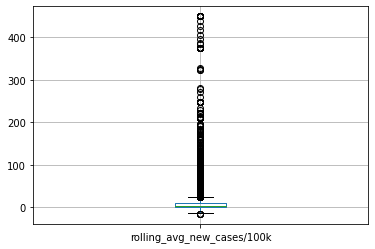

In [ ]:
boxplot = or_bin_superset_data.boxplot(column=['rolling_avg_new_cases/100k'],rot=0, fontsize=10)

In [ ]:
or_bin_superset_data['rolling_avg_new_cases/100k'].describe()

count    5.680200e+04
mean     9.072771e+00
std      1.914729e+01
min     -1.541489e+01
25%      4.555404e-13
50%      3.219551e+00
75%      9.536637e+00
max      4.497185e+02
Name: rolling_avg_new_cases/100k, dtype: float64

# Load XGBoost Model

In [ ]:
location = '/content/drive/Shared drives/CMPE 295- Master Project/projectdata-2021/models/'
filename = location+'XGBoost.pkl'

filename = location+'XGBoost-v2.pkl'

# Load the pickled model 
loaded_model = pickle.load(open(filename, 'rb'))
      
# Use the loaded pickled model to make predictions
#Y_test = pd.DataFrame(columns = 'growth_label_cat') 
Y_predict= loaded_model.predict(X_test) 

#accuracy = loaded_model.score(X_test, Y_test)
#print("accuracy=", accuracy)

In [ ]:
or_bin_superset_data['growth_label_cat'] = Y_predict


In [ ]:
xgboost_widespread_data = or_bin_superset_data[or_bin_superset_data['growth_label_cat']==2]
print(xgboost_widespread_data.shape)
print(xgboost_widespread_data['County Name'].nunique())
xgboost_widespread_data['County Name'].unique()


(18631, 62)
32


array(['Jefferson County', 'Lake County', 'Lincoln County',
       'Benton County', 'Jackson County', 'Marion County', 'Polk County',
       'Union County', 'Washington County', 'Douglas County',
       'Grant County', 'Columbia County', 'Linn County', 'Baker County',
       'Clackamas County', 'Clatsop County', 'Coos County',
       'Crook County', 'Curry County', 'Deschutes County',
       'Hood River County', 'Josephine County', 'Klamath County',
       'Lane County', 'Malheur County', 'Morrow County',
       'Multnomah County', 'Sherman County', 'Tillamook County',
       'Umatilla County', 'Wasco County', 'Yamhill County'], dtype=object)

In [ ]:
or_bin_superset_data[or_bin_superset_data['growth_label_cat']==3]['County Name'].unique()

array(['Lake County', 'Morrow County', 'Sherman County'], dtype=object)

In [ ]:
or_bin_superset_data[or_bin_superset_data['growth_label_cat']==3].describe()

,FIPS,New cases,mask_rule_severity,m50,m50_index,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline,PopDensity,CTFIPS,STFIPS,Social.distancing.index,X..staying.home,Trips.person,X..out.of.county.trips,X..out.of.state.trips,Miles.person,Work.trips.person,Non.work.trips.person,New.COVID.cases,Population,X..change.in.consumption,Transit.mode.share,X..people.older.than.60,Median.income,X..African.Americans,X..Hispanic.Americans,X..Male,Employment.density,X..hot.spots.1000.people,Hospital.beds.1000.people,ICUs.1000.people,X..contact.tracing.workers.1000.people,New.cases.1000.people,Active.cases.1000.people,X.days..decreasing.COVID.cases,X..hospital.bed.utilization,Testing.capacity,Tests.done.1000.people,X..ICU.utilization,Ventilator.shortage,Imported.COVID.cases,COVID.exposure.1000.people,X.days..decreasing.ILI.cases,Unemployment.claims.1000.people,Unemployment.rate,X..working.from.home,Cumulative.inflation.rate,COVID.death.rate,New Cases/100k population,rolling_avg_new_cases/100k,growth_label_cat
count,107.000000,107.000000,107.0,107.000000,107.000000,107.0,107.0,107.0,107.000000,107.000000,107.0,107.000000,107.000000,107.0,107.000000,107.000000,107.000000,107.000000,107.000000,107.000000,107.000000,107.000000,107.000000,107.000000,107.000000,107.000000,107.000000,107.000000,107.000000,107.000000,107.000000,107.000000,107.000000,1.070000e+02,1.070000e+02,1.070000e+02,107.000000,107.000000,107.000000,107.000000,107.000000,107.000000,107.000000,107.000000,107.000000,107.000000,107.000000,1.070000e+02,107.000000,107.000000,1.070000e+02,107.000000,107.000000,1.070000e+02,107.0
mean,41039.523364,1.719626,10.0,5.032402,69.514019,0.0,0.0,0.0,-1.813084,-29.065421,0.0,0.678890,41039.523364,41.0,48.850467,31.168224,2.560093,22.742056,6.244860,28.296262,0.307290,2.252991,1.719626,8293.588785,-25.927103,0.219346,31.121495,40112.242991,0.211215,12.570093,53.005327,1.336449,162.523364,2.200000e+00,2.000000e-01,2.400000e-02,0.225589,9.141495,8.205607,57.348160,4.177570,583.338131,14.753364,63.943925,41.485981,19.191682,33.299065,3.700000e+00,9.222430,30.974766,1.710000e+00,1.643271,19.858001,2.120392e+01,3.0
std,5.214902,2.281155,0.0,4.442495,68.534713,0.0,0.0,0.0,10.673659,20.284891,0.0,0.659804,5.214902,0.0,10.998116,6.120621,0.466776,14.077890,7.888255,24.974156,0.159211,0.387104,2.281155,1725.149794,13.699563,0.039365,4.124730,7178.891531,0.066343,10.566360,1.063861,0.751651,28.865775,4.461791e-15,4.182929e-16,1.742887e-17,0.154708,0.258179,3.073742,0.529856,0.090396,34.821104,1.303559,3.778868,47.307777,0.963143,3.016355,7.138865e-15,0.645932,1.480062,6.692686e-16,0.089123,25.940361,2.257432e+01,0.0
min,41037.000000,0.000000,10.0,0.031000,0.000000,0.0,0.0,0.0,-58.000000,-75.000000,0.0,0.372079,41037.000000,41.0,21.000000,17.000000,1.600000,10.700000,0.000000,13.900000,0.050000,1.380000,0.000000,1708.000000,-55.400000,0.200000,22.000000,36627.000000,0.200000,3.600000,50.670000,1.000000,104.000000,2.200000e+00,2.000000e-01,2.400000e-02,0.000000,8.660000,5.000000,56.482800,4.000000,519.040000,13.010000,58.000000,12.000000,17.190000,28.000000,3.700000e+00,8.100000,30.100000,1.710000e+00,1.500000,0.000000,5.329071e-13,3.0
25%,41037.000000,0.000000,10.0,1.655500,36.000000,0.0,0.0,0.0,0.000000,-35.000000,0.0,0.372079,41037.000000,41.0,45.000000,28.000000,2.490000,13.700000,1.600000,17.200000,0.220000,2.180000,0.000000,7879.000000,-29.500000,0.200000,33.000000,36627.000000,0.200000,8.000000,53.450000,1.000000,172.000000,2.200000e+00,2.000000e-01,2.400000e-02,0.084600,8.960000,6.000000,57.195429,4.200000,576.470000,13.010000,62.000000,14.000000,19.470000,35.000000,3.700000e+00,8.900000,30.100000,1.710000e+00,1.600000,0.000000,5.329071e-13,3.0
50%,41037.000000,1.000000,10.0,4.118000,58.000000,0.0,0.0,0.0,0.000000,-23.000000,0.0,0.372079,41037